In [1]:
from rubin_sim.scheduler.utils import Sky_area_generator
import healpy as hp
%matplotlib inline
import numpy as np

In [2]:
# Full class is at: https://github.com/lsst/rubin_sim/blob/main/rubin_sim/scheduler/utils/sky_area.py
class My_new_footprint_generator(Sky_area_generator):
    #XXX#
    # Call it whatever you like, set the label kwarg to what you like
    def add_my_new_region(self, filter_ratios, radius=6., label='new_region'):
    #XXX#
        temp_map = np.zeros(hp.nside2npix(self.nside))
        #XXX#
        # Replace below with code that sets the HEALpix you are interested in to
        # a non-zero value
        # Let's set three points 
        ra = [40,40,40]
        dec = [-90, -60, -20]
        for r,d in zip(ra, dec):
            # Use internal method to find HEALpix within radius of our RA,Dec points
            temp_map += self._set_circular_region(r, d, radius)
        #XXX#
            
        # Don't overide any pixels that have already been designated
        indx = np.where((temp_map > 0) & (self.pix_labels == ""))
        self.pix_labels[indx] = label
        for filtername in filter_ratios:
            self.healmaps[filtername][indx] = filter_ratios[filtername]
            
    def return_maps(
        self,
        magellenic_clouds_ratios={"u": 0.32,"g": 0.4,"r": 1.0,"i": 1.0,"z": 0.9,"y": 0.9,},
        scp_ratios={"u": 0.1, "g": 0.1, "r": 0.1, "i": 0.1, "z": 0.1, "y": 0.1},
        nes_ratios={"g": 0.28, "r": 0.4, "i": 0.4, "z": 0.28},
        dusty_plane_ratios={"u": 0.1,"g": 0.28, "r": 0.28,"i": 0.28,"z": 0.28,"y": 0.1,},
        low_dust_ratios={"u": 0.32, "g": 0.4, "r": 1.0, "i": 1.0, "z": 0.9, "y": 0.9},
        bulge_ratios={"u": 0.18, "g": 1.0, "r": 1.05, "i": 1.05, "z": 1.0, "y": 0.23},
        virgo_ratios={"u": 0.32, "g": 0.4, "r": 1.0, "i": 1.0, "z": 0.9, "y": 0.9},
        #XXX#
        #Add what you want the filter distribution to be on your new area. Setting extreme so it shows up.
        # If in doubt, just use the same as low_dust_ratios
        my_new_ratios={"u": 5, "g": 5, "r": 5, "i": 5, "z": 5, "y": 5},
        #XXX#
        ):
        # Array to hold the labels for each pixel
        self.pix_labels = np.zeros(hp.nside2npix(self.nside), dtype="U20")
        self.healmaps = np.zeros(
            hp.nside2npix(self.nside),
            dtype=list(zip(["u", "g", "r", "i", "z", "y"], [float] * 7)),
        )

        # Note, order here matters. Once a HEALpix is set and labled, subsequent add_ methods
        # will not override that pixel.
        #XXX# Add the call to the new method above
        self.add_my_new_region(my_new_ratios)
        #XXX#
        self.add_magellanic_clouds(magellenic_clouds_ratios)
        self.add_lowdust_wfd(low_dust_ratios)
        self.add_virgo_cluster(virgo_ratios)
        self.add_bulge(bulge_ratios)
        self.add_nes(nes_ratios)
        self.add_dusty_plane(dusty_plane_ratios)
        self.add_scp(scp_ratios)

        return self.healmaps, self.pix_labels

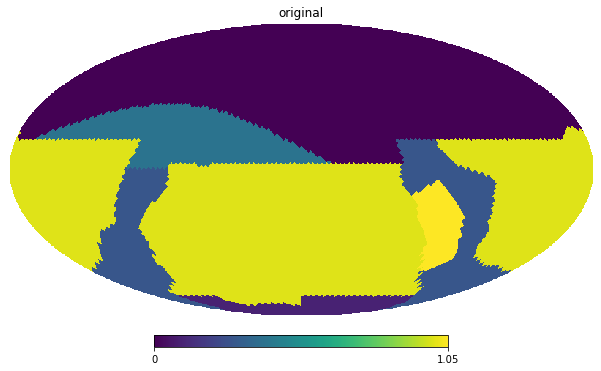

In [3]:
sag = Sky_area_generator()
sky_maps, labels = sag.return_maps()
hp.mollview(sky_maps['r'], title='original')

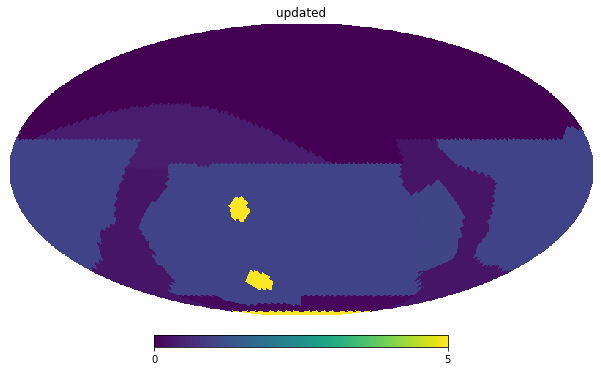

In [4]:
sag = My_new_footprint_generator()
sky_maps, labels = sag.return_maps()
hp.mollview(sky_maps['r'], title='updated')

0 
1 LMC_SMC
2 bulge
3 dusty_plane
4 lowdust
5 nes
6 new_region
7 scp
8 virgo


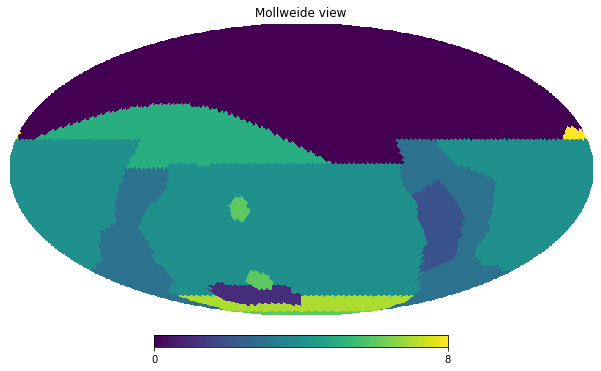

In [5]:
# Look at the labels
label_int = np.zeros(hp.nside2npix(32))
for i,label in enumerate(np.unique(labels)):
    indx = np.where(labels == label)[0]
    label_int[indx] = i
    print(i, label)
hp.mollview(label_int)